In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import datetime
import platform

In [28]:
data = tf.keras.datasets.mnist

In [29]:
(training_images, training_labels), (test_images, test_labels) = data. load_data()


In [30]:
training_images=training_images/255
test_images=test_images/255
training_images = training_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

In [31]:
print('X_train:', training_images.shape)
print('y_train:', training_labels.shape)
print('X_validation:', test_images.shape)
print('y_validation:', test_labels.shape)

X_train: (60000, 28, 28, 1)
y_train: (60000,)
X_validation: (10000, 28, 28, 1)
y_validation: (10000,)


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(training_images, training_labels, test_size = 0.2,random_state = 1212)

In [33]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_validation.shape)
print('y_validation:', y_validation.shape)

X_train: (48000, 28, 28, 1)
y_train: (48000,)
X_validation: (12000, 28, 28, 1)
y_validation: (12000,)


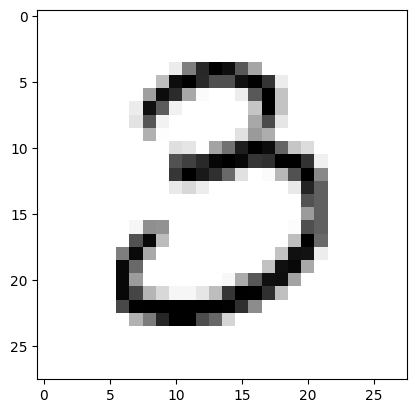

In [184]:
plt.imshow(X_train[2], cmap=plt.cm.binary)
#plt.show()
plt.savefig('mnist.jpg')

In [90]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [91]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [93]:
class callBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy')>0.95):
            print("95% reached")
            self.model.stop_training = True
callbacks = callBack()
#not helpful here

In [94]:
model.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 54ms/step - accuracy: 0.8924 - loss: 0.3410
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 89s 59ms/step - accuracy: 0.9818 - loss: 0.0581
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 141s 58ms/step - accuracy: 0.9886 - loss: 0.0370
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 89s 59ms/step - accuracy: 0.9914 - loss: 0.0262
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 90s 60ms/step - accuracy: 0.9940 - loss: 0.0191
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 90s 60ms/step - accuracy: 0.9943 - loss: 0.0179
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9959 - loss: 0.0125
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9961 - loss: 0.0121
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9967 - loss: 0.0091
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9972 - loss: 0.0090


In [95]:
validation_loss, validation_accuracy = model.evaluate(X_validation, y_validation)
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9908 - loss: 0.0440
Validation loss:  0.03489796817302704
Validation accuracy:  0.9923333525657654


In [96]:
model.save('number_cnn1.keras')


In [97]:
loaded_model = tf.keras.models.load_model('number_cnn1.keras')

In [353]:
def predict_image(image):
    prediction = loaded_model.predict(image)
    predicted_class = np.argmax(prediction, axis=1)[0]  # Get the index of the predicted class
    return predicted_class

In [354]:
from PIL import Image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.convert("L")
    #image = image.convert("RGB")
    image = image.rotate(-90)
    threshold = 130  # Adjust this threshold value as needed
    image = image.point(lambda p: p > threshold and 255)
    image = image.resize((28, 28))  # Resize image to match model input size
    image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    image = 1-np.array(image)
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

In [358]:
image_path = "IMG_2504.jpg"
# Preprocess the image
preprocessed_image = preprocess_image(image_path)
# Perform prediction
print(preprocessed_image.shape)
predicted_class = predict_image(preprocessed_image)
# Print the predicted class
print("Predicted class:", predicted_class)

(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted class: 5


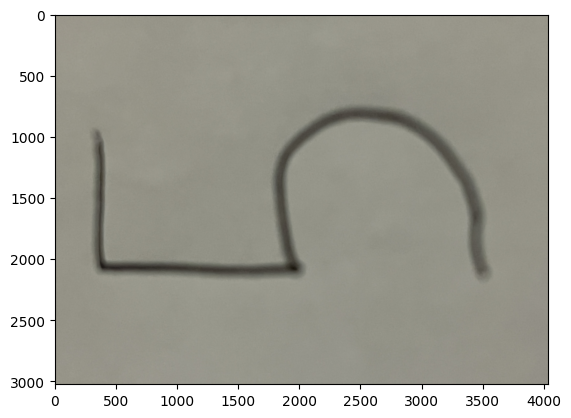

In [359]:
image = Image.open(image_path)
plt.imshow(image)

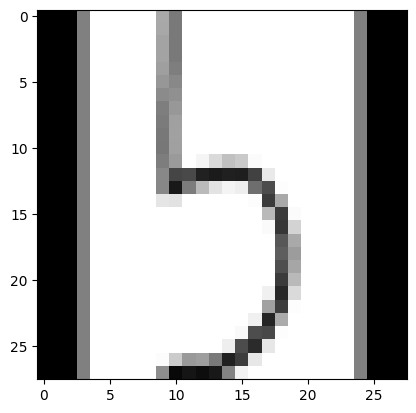

In [360]:
plt.imshow(preprocessed_image.reshape((28, 28)), cmap=plt.cm.binary)

In [195]:
image_path = "mnist.jpg"
# Preprocess the image
preprocessed_image = preprocess_image(image_path)
# Perform prediction
print(preprocessed_image.shape)
predicted_class = predict_image(preprocessed_image)
g = loaded_model.predict([X_train])
print(g[2])
# Print the predicted class
print("Predicted class:", predicted_class)

(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step
[1.07950045e-05 5.49406770e-11 3.78706955e-06 9.99973416e-01
 7.04758266e-11 1.11175166e-06 2.84922241e-09 1.13302076e-06
 9.43084797e-06 2.89467323e-07]
Predicted class: 8


375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
[1.8942766e-13 8.8745946e-07 3.7411445e-11 1.1713866e-15 9.9999249e-01
 4.9146295e-12 8.1365341e-09 1.3001797e-12 5.5149291e-11 6.5856830e-06]


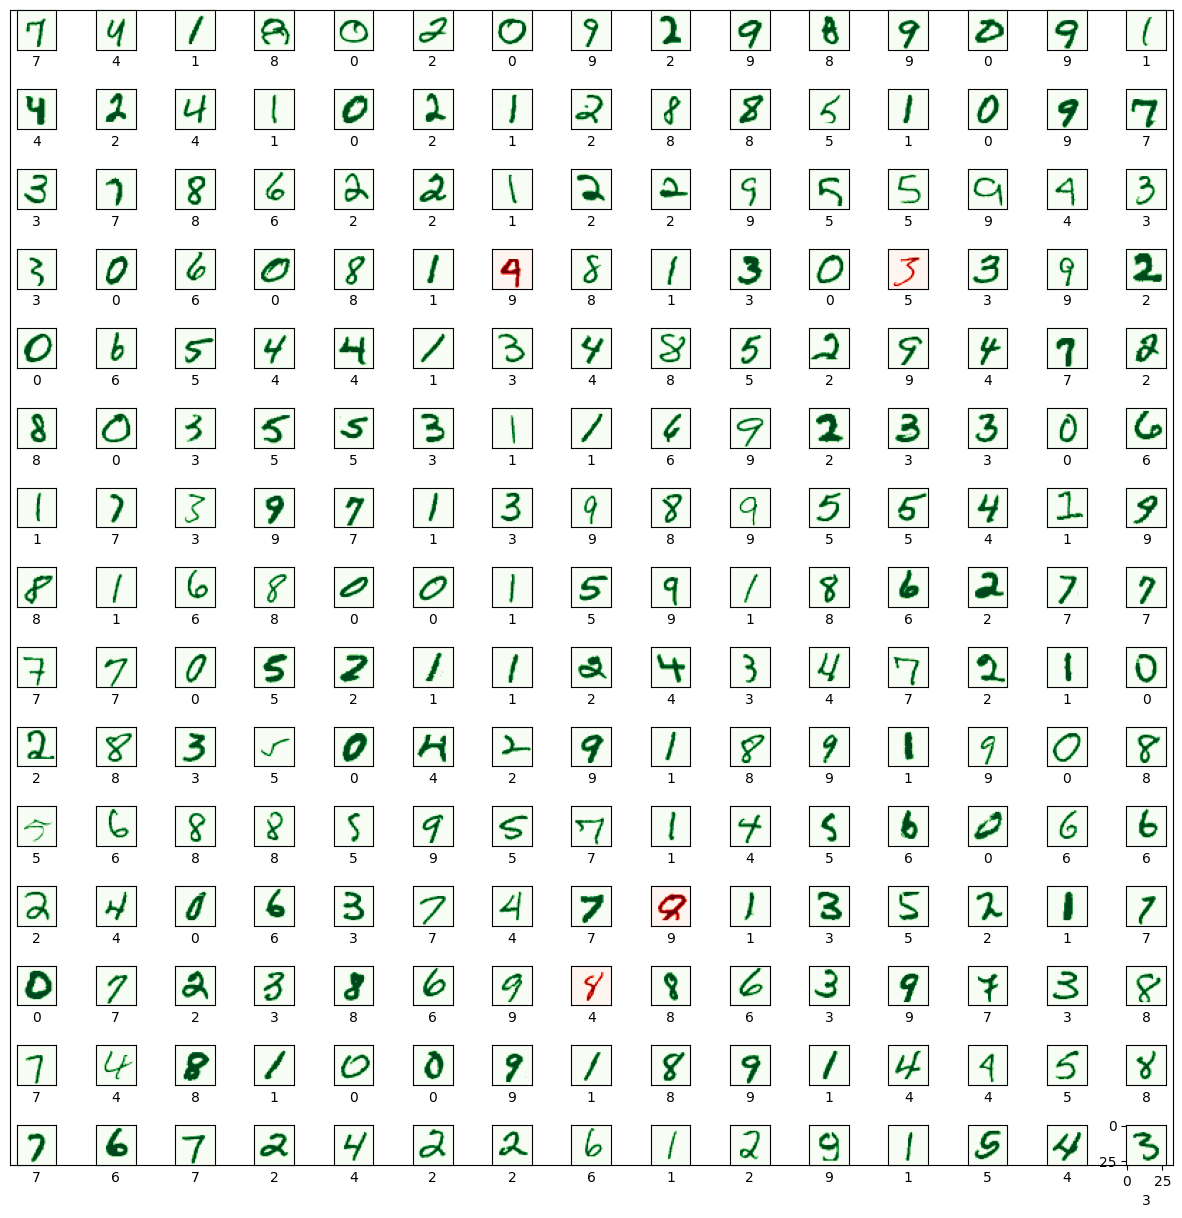

In [238]:
predictions_one_hot = loaded_model.predict([X_validation])
predictions = np.argmax(predictions_one_hot, axis=1)
print(predictions_one_hot[1])
pd.DataFrame(predictions)
numbers_to_display = 225
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15)) 
for plot_index in range(numbers_to_display): 
 predicted_label = predictions[plot_index]
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 color_map = 'Greens' if predicted_label == y_validation[plot_index] else 'Reds'
 plt.subplot(num_cells, num_cells, plot_index + 1)
 plt.imshow(X_validation[plot_index].reshape((28, 28)), cmap=color_map)
 plt.xlabel(predicted_label)
plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()